# Setup

Importing libraries and mounting Google Drive to perform data I/O

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read cleaned and imputed data

In [2]:
data_filepath = '/content/drive/MyDrive/AML Group 24/Files/'
df = pd.read_parquet(data_filepath + 'met_gas_site_cleaned.snappy.parquet', engine='pyarrow') # Read data

# Correlation matrix

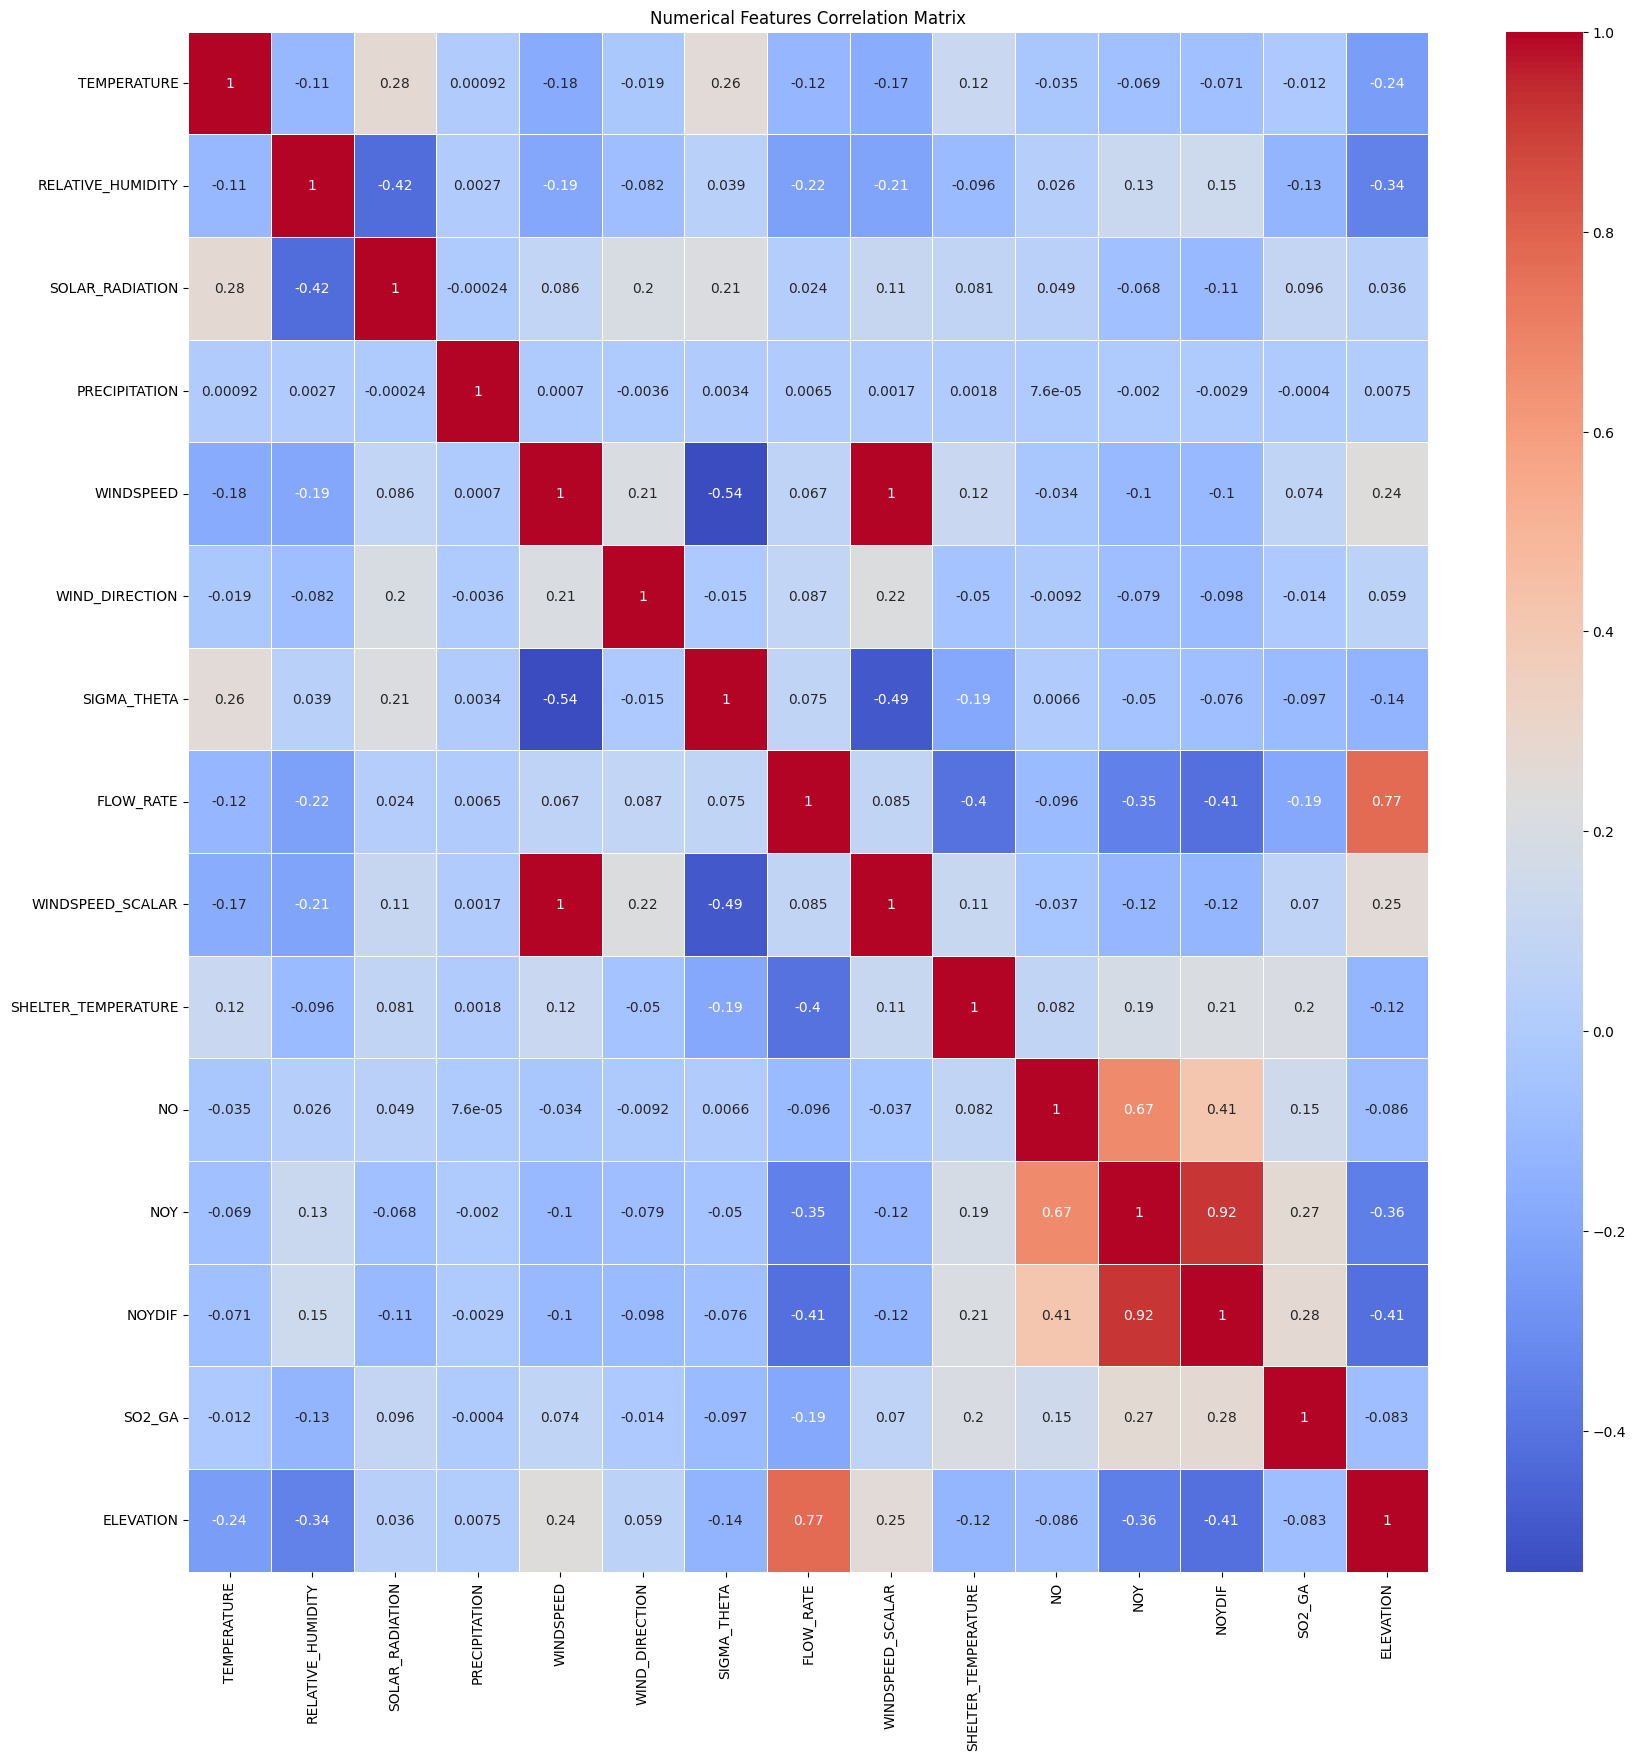

In [3]:
correlation_matrix = df[['TEMPERATURE', 'RELATIVE_HUMIDITY', 'SOLAR_RADIATION',
                         'PRECIPITATION', 'WINDSPEED', 'WIND_DIRECTION', 'SIGMA_THETA',
                         'FLOW_RATE', 'WINDSPEED_SCALAR', 'SHELTER_TEMPERATURE',
                         'NO', 'NOY', 'NOYDIF', 'SO2_GA', 'ELEVATION']].astype(float).corr() # Calculate correlation
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # Plot the correlation as a heatmap
plt.title('Numerical Features Correlation Matrix') # Set title
plt.show() # Show plot

# Distribution of ozone concentration

<ipython-input-4-f7923fc2fadd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([(y*100) for y in plt.gca().get_yticks()]) # Set y-axis to display percentages


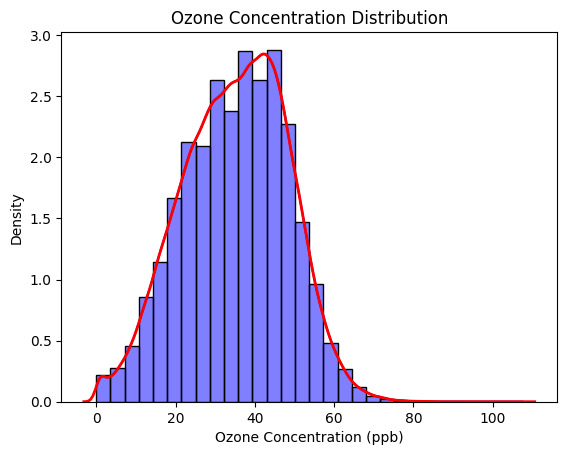

In [4]:
sns.histplot(data=df, x='OZONE', kde=True, color='blue', bins=30, stat="density") # Create a histogram of ozone
sns.kdeplot(data=df, x='OZONE', color='red', linewidth=2) # Create a KDE plot with a different color (e.g., red)
plt.xlabel('Ozone Concentration (ppb)') # Set x-axis label
plt.ylabel('Density') # Set y-axis label
plt.title('Ozone Concentration Distribution') # Set title
plt.gca().set_yticklabels([(y*100) for y in plt.gca().get_yticks()]) # Set y-axis to display percentages
plt.show() # Display the plot

# Correlation of features with ozone

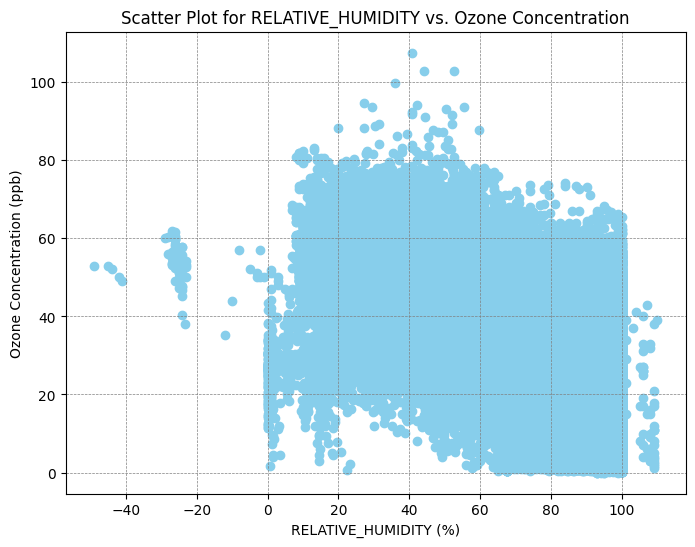

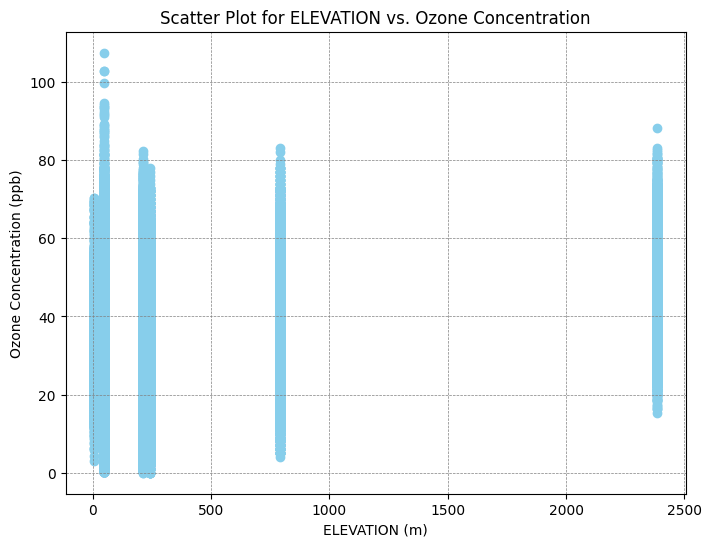

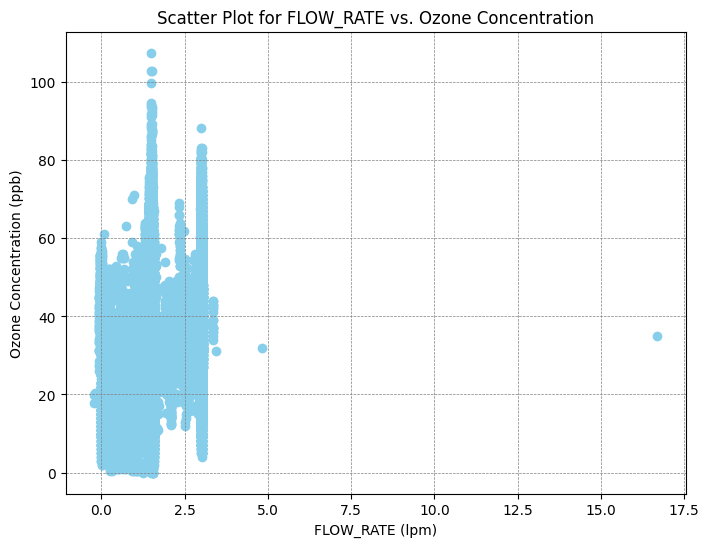

In [5]:
from sklearn.linear_model import LinearRegression

df_X = df.drop(columns=['OZONE','DATE_TIME','QA_CODE','SITE_ID'])
df_X['LAND_USE'] = df['LAND_USE'].astype('category').cat.codes
df_X['TERRAIN'] = df['TERRAIN'].astype('category').cat.codes
df_y = df['OZONE']
r2_values = []

for feature_name in df_X.columns: # Loop through each feature in df_X
    X = df_X[[feature_name]] # Select the feature
    y = df_y # Select the target variable
    model = LinearRegression()
    model.fit(X, y) # Fit a linear regression model
    y_pred = model.predict(X) # Predict the target variable using the model
    r2 = model.score(X, y) # Calculate the R-squared value
    r2_values.append((feature_name, r2)) # Append the R-squared value and feature name to the list
r2_values.sort(key=lambda x: x[1], reverse=True) # Sort the list by R-squared values in descending order
top_features = r2_values[:3] # Select the top 3 features with the highest R-squared values
top_feature_names, top_r2_values = zip(*top_features) # Extract feature names and corresponding R-squared values
units = {"RELATIVE_HUMIDITY":"%", "ELEVATION":"m", "FLOW_RATE":"lpm"} #units

for feature_name in top_feature_names: # Create scatter plots for the top 3 features
  X = df_X[[feature_name]] # Select the feature
  y = df_y # Select the target variable
  plt.figure(figsize=(8, 6))
  plt.scatter(X, y, color='skyblue') # Scatter plot of ozone vs feature
  plt.xlabel(f"{feature_name} ({units[feature_name]})") # Set x-axis label
  plt.ylabel('Ozone Concentration (ppb)') # Set y-axis label
  plt.title(f'Scatter Plot for {feature_name} vs. Ozone Concentration') # Set title
  plt.grid(True, linestyle='--', color='gray', linewidth=0.5) # Show grid
  plt.show() # Display the plot